In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install --upgrade tensorflow
df = pd.read_csv("Spotify.csv")
df.head()

,genre,popularity,energy,valence
0,Movie,0,0.910,0.814
1,Movie,1,0.737,0.816
2,Movie,3,0.131,0.368
3,Movie,0,0.326,0.227
4,Movie,4,0.225,0.390


In [13]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   genre       232725 non-null  object 
 1   popularity  232725 non-null  int64  
 2   energy      232725 non-null  float64
 3   valence     232725 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ MB


genre         0
popularity    0
energy        0
valence       0
dtype: int64

In [29]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()




['popularity', 'energy', 'valence', 'genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues', "genre_Children's Music", 'genre_Children’s Music', 'genre_Classical', 'genre_Comedy', 'genre_Country', 'genre_Dance', 'genre_Electronic', 'genre_Folk', 'genre_Hip-Hop', 'genre_Indie', 'genre_Jazz', 'genre_Movie', 'genre_Opera', 'genre_Pop', 'genre_R&B', 'genre_Rap', 'genre_Reggae', 'genre_Reggaeton', 'genre_Rock', 'genre_Ska', 'genre_Soul', 'genre_Soundtrack', 'genre_World']


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('popularity', axis=1)
y = df['popularity']
X_train, y_train , X_test, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
print("rmse:",rmse)
print("mae:",mae)


rmse: 9.640458908432667
mae: 7.296058890002283


C:\Users\omar7\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
# Drop only the target column
X = df.drop('popularity', axis=1)

# Set the target
y = df['popularity']


In [55]:
print(X.shape)
print(y.shape)


(232725, 29)
(232725,)


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 9.640458908432667
MAE: 7.296058890002283


C:\Users\omar7\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


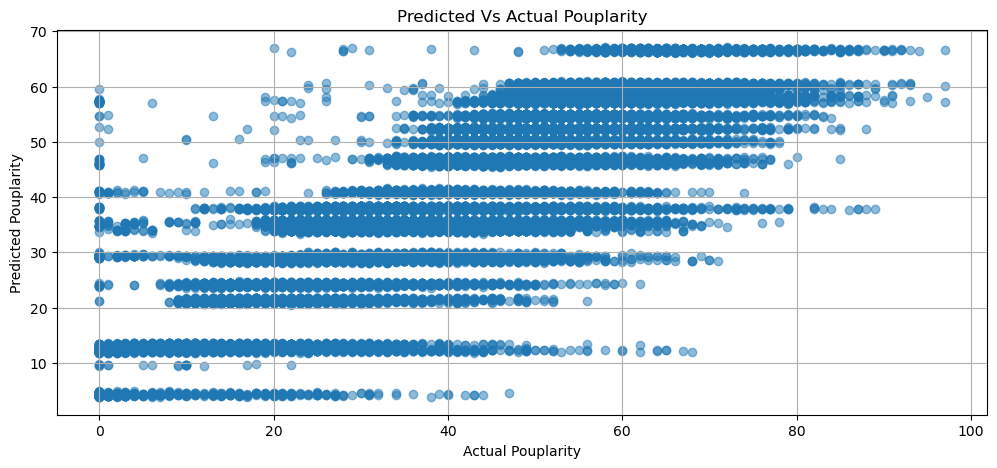

In [61]:
plt.figure(figsize=(12,5))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual Pouplarity")
plt.ylabel("Predicted Pouplarity")
plt.title("Predicted Vs Actual Pouplarity")
plt.grid(True)
plt.show()

In [67]:
import joblib

# Save the model
joblib.dump(model, 'spotify_and_chill.pkl')


['spotify_and_chill.pkl']

In [69]:
model = joblib.load('spotify_and_chill.pkl')
